Zbiory danych
-------------

- https://www.kaggle.com/datasets
- https://dane.gov.pl/
- https://toolbox.google.com/datasetsearch
- http://www.letmegooglethat.com/?q=awesome+datasets


Dane tabelaryczne

- Excel
- Google SpredSheet
- SQL

![](../images/spredsheet.png)
 

CSV
===
- excel
- google spreadsheet
- open office

1. jak wyglada
2. jak się otwiera

CSV

- kazda linia jest adomowa
- pola sa oddzielone separatore
- tylko dane, zadnych smieci protokołów, instrukcji, bloków (!;\t,)
- nie potrzebuje zadnego edytora
- nie potrzebuje excela



In [21]:
import os
from time import time

def parse_csv_file(datafile):
    data = []
    with open(datafile) as f:
        for line in f:
            data.append(line)
    return data

start = time()
data = parse_csv_file('../datasets/otomoto.csv')
end = time()

time_taken = end - start

print("it tooks {} secconds", time_taken)

it tooks {} secconds 0.36740922927856445


In [22]:
data[1]

'"6039269187";"https://www.otomoto.pl/oferta/renault-fluence-bezwypadkowy-instalacja-gazowa-ID6AI9Nx.html";"";"Renault";"Fluence";"Osobowe";"1 600 cm3";"5";"";"";"Sedan";"2013";"";"";"";"";"";"Tak";"";"Benzyna+LPG";"";"Czechy";"";"Tak";"Używane";"8 listopad 2013";"Renault Fluence";"25900.0";"Manualna";"";"";"4";"";"172 000 km";"Tak";"";"";"Osoby prywatnej";"";"Biały";"Na przednie koła";"110 KM"\n'

In [8]:
start = time()
listings = parse_csv_file('../datasets/listings_dec18.csv')
calendar = parse_csv_file('../datasets/calendar_dec18.csv')
end = time()

time_taken = end - start

print("it tooks {} secconds", time_taken)

it tooks {} secconds 4.629140853881836


Excel is not able to handle it
------------------------------
Try to import it with excel!! What if you would import whole year or more?!

![](../images/overloaded.jpg)

In [18]:
import os
import csv
from pprint import pprint

file_path = '../datasets/otomoto--s.csv'
with open(file_path, 'r') as f:
    r = csv.DictReader(f, delimiter=";")
    pprint(next(r))

OrderedDict([('id', '6039269187'),
             ('url',
              'https://www.otomoto.pl/oferta/renault-fluence-bezwypadkowy-instalacja-gazowa-ID6AI9Nx.html'),
             ('Faktura VAT', ''),
             ('Marka pojazdu', 'Renault'),
             ('Model pojazdu', 'Fluence'),
             ('Kategoria', 'Osobowe'),
             ('Pojemność skokowa', '1 600 cm3'),
             ('Liczba miejsc', '5'),
             ('Zarejestrowany w Polsce', ''),
             ('Wersja', ''),
             ('Typ', 'Sedan'),
             ('Rok produkcji', '2013'),
             ('Serwisowany w ASO', ''),
             ('Leasing', ''),
             ('VIN', ''),
             ('Homologacja ciężarowa', ''),
             ('VAT marża', ''),
             ('Pierwszy właściciel', 'Tak'),
             ('Filtr cząstek stałych', ''),
             ('Rodzaj paliwa', 'Benzyna+LPG'),
             ('Emisja CO2', ''),
             ('Kraj pochodzenia', 'Czechy'),
             ('Numer rejestracyjny pojazdu', ''),
        

- Policz średni przebieg dla samochodów kolejnych rocznikach 2000 -> 2018
- Policz średnią cenę dla samochodów w kolejnych rocznikach 2000 -> 2018

- Policz średnią cenę dla samochodów marki audi w kolejnych rocznikach 2000 -> 2018
- Policz średnią cenę dla samochodów marki renault w kolejnych rocznikach 2000 -> 2018

- Czy samochody konkretnej marki mają większą skłonność do utrzymywania ceny?

EXCEL
======

- https://dane.gov.pl/dataset/1076

Excel jaki jest kazdy widzi


In [25]:
!pip install xlrd

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
import xlrd
from pprint import pprint as pp

filepath = '../datasets/budzet/Sprawozdanie_operatywne_01_2018.xlsx'

def parse_file(datafile):
    workbook = xlrd.open_workbook(datafile)
    sheet = workbook.sheet_by_name('TABLICA 1  ')
    data = [[sheet.cell_value(r, col)
            for col in range(sheet.ncols)
                for r in range (sheet.nrows)]]
    
    #Usfule commands
    print(" | ".join(workbook.sheet_names()))
    pp("columns {}".format(sheet.ncols))
    pp("rows {}".format(sheet.nrows))
    pp("Deficyt ustawa budżetowa 2018 {}".format(sheet.cell_value(11, 1)))
    #Cell type -> https://xlrd.readthedocs.io/en/latest/api.html#xlrd.sheet.Cell
    pp(sheet.cell_type(11, 1)) #3 -> date | 2 -> number  
    pp(sheet.col_values(1, start_rowx=9, end_rowx=12))
    
parse_file(filepath)


TYTUŁ | SPIS TREŚCI    | UWAGA | TABLICA 1   | TABLICA 2   | Tablica 3 | TABLICA 4  | TABLICA 5    | TABLICA 6 | TABLICA  7 | TABLICA 8  | TABLICA 9  | TABLICA 10  | TABLICA 11 | TABLICA 12 | TABLICA 13 | TABLICA 14 | TABLICA 15  | TABLICA 16 | TYTUŁ-środ.europejskie | TABLICA 17 | TABLICA 18  | TABLICA 19 | TABLICA 20 | WYKRES1 | WYKRES2 | WYKRES3 | WYKRES4 | WYKRES5 | WYKRES6 | WYKRES7
'columns 8'
'rows 30'
'Deficyt ustawa budżetowa 2018 -41492000.0'
2
[355705405.0, 397197405.0, -41492000.0]


In [44]:
file_to_be_processed = [
    "../datasets/budzet/Sprawozdanie_operatywne_{}_{}.xlsx".format(month, year)
    for year in [2017,2018]
    for month in (str(x).zfill(2) for x in range(1, 13))
]
file_to_be_processed

['../datasets/budzet/Sprawozdanie_operatywne_01_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_02_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_03_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_04_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_05_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_06_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_07_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_08_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_09_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_10_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_11_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_12_2017.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_01_2018.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_02_2018.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_03_2018.xlsx',
 '../datasets/budzet/Sprawozdanie_operatywne_04_2018.xlsx',
 '../datasets/budzet/Sprawozdanie_operat

In [82]:
import os
import collections

def parse_raport(filepath):
    Raport = collections.namedtuple('Raport', ['income', 'spending'])
    
    if not os.path.isfile(filepath):
        return Raport(0,0)

    workbook = xlrd.open_workbook(filepath)
    sheet = workbook.sheet_by_name('TABLICA 2  ')
    
    return Raport._make([
        sheet.cell_value(colx=4, rowx=10),
        sheet.cell_value(colx=4, rowx=11)
    ])

In [137]:
raports = [parse_raport(filepath) for filepath in file_to_be_processed]
periods = [
    "{}_{}".format(str(year)[2:], month)
    for year in [2017,2018]
    for month in (str(x).zfill(2) for x in range(1, 13))
]


In [138]:
def calculate_gap(raport):
    return raport.income - raport.spending

gaps = (calculate_gap(raport) for raport in raports)
by_months_raports = list(zip(periods, gaps))


In [139]:
list(by_months_raports)

[('17_01', 0),
 ('17_02', 0),
 ('17_03', 0),
 ('17_04', 0),
 ('17_05', 0),
 ('17_06', 0),
 ('17_07', 0),
 ('17_08', 0),
 ('17_09', 0),
 ('17_10', 0),
 ('17_11', 0),
 ('17_12', 0),
 ('18_01', 8562201.574900005),
 ('18_02', 4460750.1897300035),
 ('18_03', 3127629.870230004),
 ('18_04', 9325199.864960015),
 ('18_05', 9585339.624609977),
 ('18_06', 9535471.885930002),
 ('18_07', -858700.8377099931),
 ('18_08', 1052244.8392800093),
 ('18_09', 3183692.616449952),
 ('18_10', 6476311.153139949),
 ('18_11', 11060094.722169995),
 ('18_12', 0)]

In [89]:
!pip install seaborn 

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
    100% |████████████████████████████████| 13.9MB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 28.7MB 579kB/s ta 0:00:011
    100% |████████████████████████████████| 15.9MB 1.1MB/s ta 0:00:01   42% |█████████████▌                  | 6.7MB 2.9MB/s eta 0:00:04
    100% |████████████████████████████████| 14.1MB 1.6MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/68/f2/21ec13269a420c063a3d7d8c87dac030da7b00fc6b27fa88cfb1c72a645b/kiwisolver-1.0.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.m

In [154]:
import pandas as pd

data = list(by_months_raports)
sns.set(style="darkgrid")
df = pd.DataFrame(data, columns=['date', 'deficyt'])
df['deficyt'] = df['deficyt'].apply(lambda d: round(d / 1000000, 2))

In [155]:
df.tail(5)

,date,deficyt
19,18_08,1.05
20,18_09,3.18
21,18_10,6.48
22,18_11,11.06
23,18_12,0.00


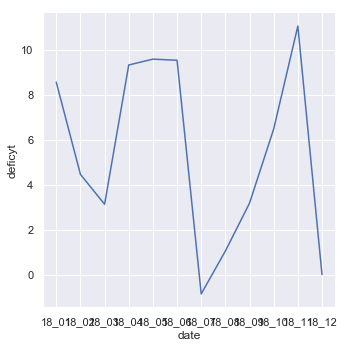

In [170]:
import seaborn as sns
sns.relplot(
    x="date",
    y="deficyt",
    sort=False,
    kind="line",
    data=df.tail(12)
);

Format Json
===========

- Items may have different fields
- fields have keys and values
- values may be different formats
- values may be json objects itself
- values may be collections

Materiały

- http://www.json.org/
- https://docs.python.org/3/library/json.html

```python
# python script
import json
help(json)
```

Najczesciej web service

- musicbrainz - https://musicbrainz.org/doc/Development/XML_Web_Service/Version_2
- nbp http://api.nbp.pl/

- https://musicbrainz.org/ws/2/artist/00a9f935-ba93-4fc8-a33a-993abe9c936b?fmt=json&inc=releases
- http://api.nbp.pl/api/exchangerates/tables/A?format=json

In [5]:
import json
help(json)

Help on package json:

NAME
    json

DESCRIPTION
    JSON (JavaScript Object Notation) <http://json.org> is a subset of
    JavaScript syntax (ECMA-262 3rd edition) used as a lightweight data
    interchange format.
    
    :mod:`json` exposes an API familiar to users of the standard library
    :mod:`marshal` and :mod:`pickle` modules.  It is derived from a
    version of the externally maintained simplejson library.
    
    Encoding basic Python object hierarchies::
    
        >>> import json
        >>> json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])
        '["foo", {"bar": ["baz", null, 1.0, 2]}]'
        >>> print(json.dumps("\"foo\bar"))
        "\"foo\bar"
        >>> print(json.dumps('\u1234'))
        "\u1234"
        >>> print(json.dumps('\\'))
        "\\"
        >>> print(json.dumps({"c": 0, "b": 0, "a": 0}, sort_keys=True))
        {"a": 0, "b": 0, "c": 0}
        >>> from io import StringIO
        >>> io = StringIO()
        >>> json.dump(['streaming API'], io

QUIZ:

1. Wyswietl tytułów i liste albumow swojego ulubionego artysty
2. Ile Albumów wydał Michael Jackson 
3. Jak wiele zespołów nosi nazwlę "FIRST AID KIT"
4. Gdzie został założony zespół Queen?
5. Spanish alias for Beatles?
6. Sprecyzowanie "disambiguation" dla zespołu Nirvana (Kurt Cobain)
7. Kiedy został założony One Direction




In [85]:
!pip install requests

  Using cached https://files.pythonhosted.org/packages/ff/17/5cbb026005115301a8fb2f9b0e3e8d32313142fe8b617070e7baad20554f/requests-2.20.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/00/ee1d7de624db8ba7090d1226aebefab96a2c71cd5cfa7629d6ad3f61b79e/urllib3-1.24.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 163kB 1.6MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4b/2a/0276479a4b3caeb8a8c1af2f8e4355746a97fab05a372e4a2c6a6b876165/idna-2.7-py2.py3-none-any.whl
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import requests
import json

url = "https://musicbrainz.org/ws/2/artist/{}?fmt=json&inc=releases".format('00a9f935-ba93-4fc8-a33a-993abe9c936b')
artist_url = "https://musicbrainz.org/ws/2/artist/"
it_works = 'https://musicbrainz.org/ws/2/artist?query=Nightwish&fmt=json'

params = {
    "fmt": "json",
    "query": "Nightwish"
}

r = requests.get(artist_url, params=params)



In [16]:
x = r.json()
x

{'created': '2019-02-07T14:03:47.655Z',
 'count': 2,
 'offset': 0,
 'artists': [{'id': '00a9f935-ba93-4fc8-a33a-993abe9c936b',
   'type': 'Group',
   'type-id': 'e431f5f6-b5d2-343d-8b36-72607fffb74b',
   'score': 100,
   'name': 'Nightwish',
   'sort-name': 'Nightwish',
   'country': 'FI',
   'area': {'id': '6a264f94-6ff1-30b1-9a81-41f7bfabd616',
    'type': 'Country',
    'type-id': '06dd0ae4-8c74-30bb-b43d-95dcedf961de',
    'name': 'Finland',
    'sort-name': 'Finland',
    'life-span': {'ended': None}},
   'begin-area': {'id': 'a62f5ab3-c6e2-4b1e-b35f-2d83cd20ab58',
    'type': 'City',
    'type-id': '6fd8f29a-3d0a-32fc-980d-ea697b69da78',
    'name': 'Kitee',
    'sort-name': 'Kitee',
    'life-span': {'ended': None}},
   'disambiguation': 'Finnish symphonic metal',
   'life-span': {'begin': '1996-07', 'ended': None},
   'aliases': [{'sort-name': 'Nightiwish',
     'name': 'Nightiwish',
     'locale': None,
     'type': None,
     'primary': None,
     'begin-date': None,
     'en

In [3]:
import json
loaded = json.loads(r.content)
loaded['artists'][0]['id']

'00a9f935-ba93-4fc8-a33a-993abe9c936b'

In [108]:
def get_artist_details(artistid):
    params = {
        "fmt": "json",
        "inc": "releases"
    }

    r = requests.get(artist_url + artistid, params=params)
    return r.json()

In [110]:
from pprint import pprint as pp
details = get_artist_details('00a9f935-ba93-4fc8-a33a-993abe9c936b')
pp(details)

{'area': {'disambiguation': '',
          'id': '6a264f94-6ff1-30b1-9a81-41f7bfabd616',
          'iso-3166-1-codes': ['FI'],
          'name': 'Finland',
          'sort-name': 'Finland'},
 'begin_area': {'disambiguation': '',
                'id': 'a62f5ab3-c6e2-4b1e-b35f-2d83cd20ab58',
                'name': 'Kitee',
                'sort-name': 'Kitee'},
 'country': 'FI',
 'disambiguation': 'Finnish symphonic metal',
 'end_area': None,
 'gender': None,
 'gender-id': None,
 'id': '00a9f935-ba93-4fc8-a33a-993abe9c936b',
 'ipis': [],
 'isnis': ['0000000106662492'],
 'life-span': {'begin': '1996-07', 'end': None, 'ended': False},
 'name': 'Nightwish',
 'releases': [{'barcode': None,
               'country': 'FI',
               'date': '1996',
               'disambiguation': '',
               'id': '15876c81-1bed-442a-905c-edc7256ea8ee',
               'packaging': None,
               'packaging-id': None,
               'quality': 'normal',
               'release-events': [{'are

Dodatkowo:

====
json
====

1. Policz liczebność artykułów w sekcjach pobranych z ``http://api.nytimes.com/svc/`` za pomocą metody ``mostpopular/v2``
2. Policz ilość obrazków dla kazdego artykułu

excel i csv
===========
Wykorzystaj moduły csv i xlrd do wczytania i przeprowadzenia dowolnej analizy na dokumenci pobranym z ``https://dane.gov.pl/``

More complex format
===================

XML
===

Html
====